# Pymaceuticals Inc.
---

### Analysis

Summary Statistics: 

The summary statistics offer valuable insights into the effectiveness and consistency of different drug regimens. Capomulin and Ramicane show lower mean tumor volumes, less variability (lower variance and standard deviation), and more precise mean estimates (lower SEM), which indicates potential efficacy in reducing tumor size. In contrast, drugs like Ketapril and Naftisol exhibit higher mean tumor volumes, greater variability, and less precise mean estimates, suggesting potentially less effective outcomes.

Bar and Pie Charts: 

The bar charts provide a clear overview of the distribution of timepoints for each drug regimen, with Capomulin and Ramicane having higher timepoint counts. The pie charts reveal a balanced gender distribution among the mice in the study, ensuring the absence of gender-related bias in the results.

Quartiles, Outliers, and Box Plots: 

Quartiles and box plots help us visualize the distribution of final tumor volumes for selected treatments. Capomulin and Ramicane display lower final tumor volumes compared to Infubinol and Ceftamin. The presence fo ourliers in specific treatments suggests differences in how well the treatment works, which should be looked into more thoroughly.

Line and Scatter Plots: 

The line plot shows the tumor volume over time for a mouse treated with Capomulin, indicating the trend of tumor size reduction during treatment. The scatter plot illustrates a moderate positive correlation between mouse weight and average tumor volume for the Capomulin regimen, suggesting that heavier mice tend to have larger tumor volumes.

Correlation and Regression: 

The correlation analysis confirms the moderate positive relationship between mouse weight and tumor volume, while the regression plot visually illustrates this relationship, providing insights into how these variables are linked.

This analysis helps us fully understand the study data. It tells us how well different drugs work, shows if there are an equal number of male and female mice and describes how tumor sizes are spread out. It also points out the relationships between important things such as the weight of the mouse vs tumor size. This information can be really useful for future research and making choices about medicines and treating cancer.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
number_of_mice = merged_data["Mouse ID"].nunique()
print("Number of Mice:", number_of_mice)

Number of Mice: 249


In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_timepoints = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids = duplicate_timepoints["Mouse ID"].unique()

In [15]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merged_data[merged_data["Mouse ID"].isin(duplicate_mouse_ids)]
display(duplicate_data)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[~merged_data["Mouse ID"].isin(duplicate_mouse_ids)]
display(cleaned_data.head())

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [36]:
# Checking the number of mice in the clean DataFrame.
updated_mice_count = cleaned_data["Mouse ID"].nunique()
print("Updated Mice Count:", updated_mice_count)

Updated Mice Count: 248


## Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean='mean',
    median='median',
    variance='var',
    standard_deviation='std',
    sem='sem'
)

summary_statistics_df = pd.DataFrame(summary_statistics)

display(summary_statistics_df)

,mean,median,variance,standard_deviation,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median','var','std', 'sem'])
print("Tumor Volume mm3")
display(summary_statistics)

Tumor Volume mm3


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

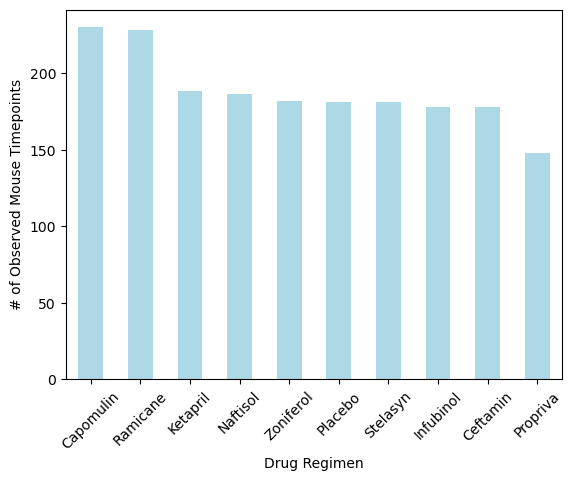

In [54]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

timepoints = cleaned_data['Drug Regimen'].value_counts()
timepoints.plot(kind='bar', color='lightblue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

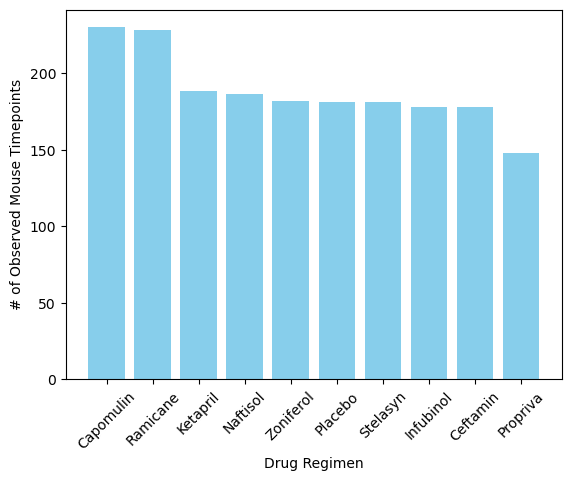

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints_pyplot = cleaned_data['Drug Regimen'].value_counts()
plt.bar(timepoints_pyplot.index, timepoints_pyplot, color='skyblue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

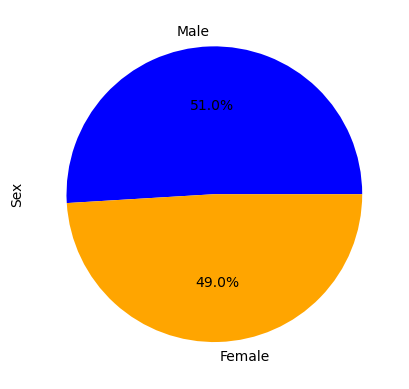

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution_pandas = cleaned_data['Sex'].value_counts()
gender_distribution_pandas.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])
plt.ylabel('Sex')
plt.show()

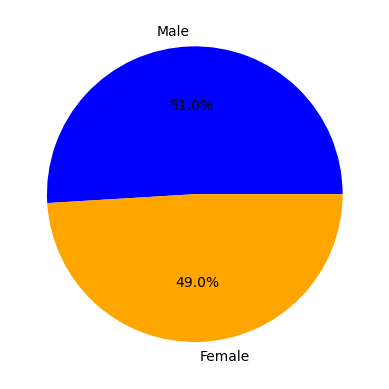

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution_pyplot = cleaned_data['Sex'].value_counts()
plt.pie(gender_distribution_pyplot, labels=gender_distribution_pyplot.index, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.show()

## Quartiles, Outliers and Boxplots

In [160]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
mouse_last_timepoint = cleaned_data.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data_last_timepoint = pd.merge(mouse_last_timepoint, cleaned_data, on=['Drug Regimen', 'Mouse ID', 'Timepoint'], how='left')

In [161]:
# Put treatments into a list for for loop (and later for plot labels)
#treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
#outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
   
    # Calculate quartiles and IQR for the subset
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
   
    # Store the tumor volumes in the dictionary
    
    # Display the tumor volumes for each treatment
    
    # add subset 

    # Determine outliers using upper and lower boundss


treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []

for treatment in treatments:
    final_tumor_volume = merged_last_timepoint_df.loc[merged_last_timepoint_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volume_data.append(final_tumor_volume)

outliers = []

for i, treatment in enumerate(treatments):
    quartiles = np.percentile(tumor_volume_data[i], [25, 50, 75])
    lower_quartile = quartiles[0]
    upper_quartile = quartiles[2]
    iqr = upper_quartile - lower_quartile

    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)

    potential_outliers = tumor_volume_data[i][(tumor_volume_data[i] < lower_bound) | (tumor_volume_data[i] > upper_bound)]
    outliers.append(potential_outliers)

    print(f"{treatment}'s potential outliers:")
    print(potential_outliers)

Capomulin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:
55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)


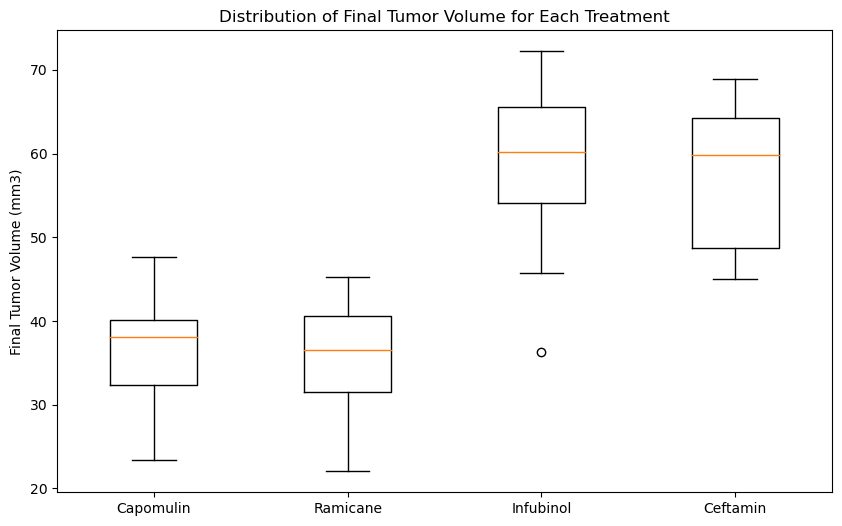

In [162]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments) 
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Final Tumor Volume for Each Treatment')
plt.show()


## Line and Scatter Plots

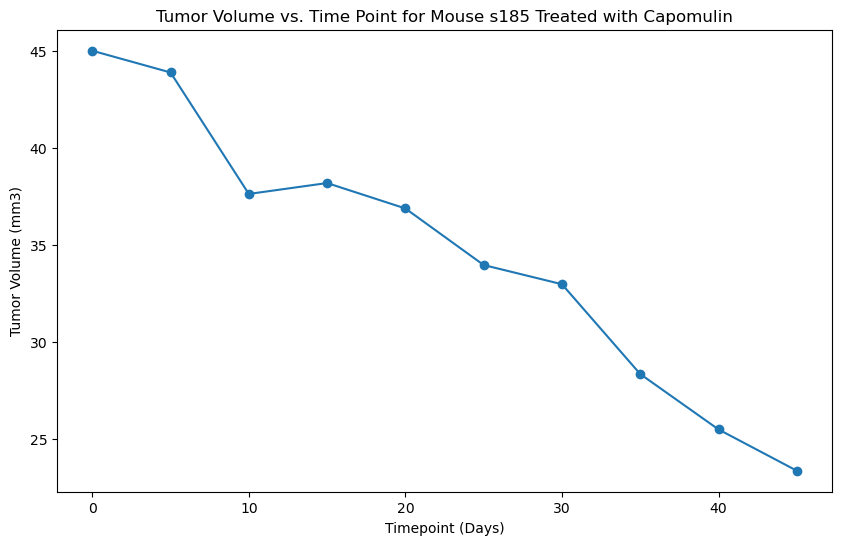

In [163]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_mouse_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

capomulin_mouse_ids = capomulin_mouse_data['Mouse ID'].unique()

selected_mouse_id = capomulin_mouse_ids[0]

specific_mouse_data = capomulin_mouse_data[capomulin_mouse_data['Mouse ID'] == selected_mouse_id]

plt.figure(figsize=(10, 6))
plt.plot(specific_mouse_data['Timepoint'], specific_mouse_data['Tumor Volume (mm3)'], marker='o')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {selected_mouse_id} Treated with Capomulin')
plt.show()

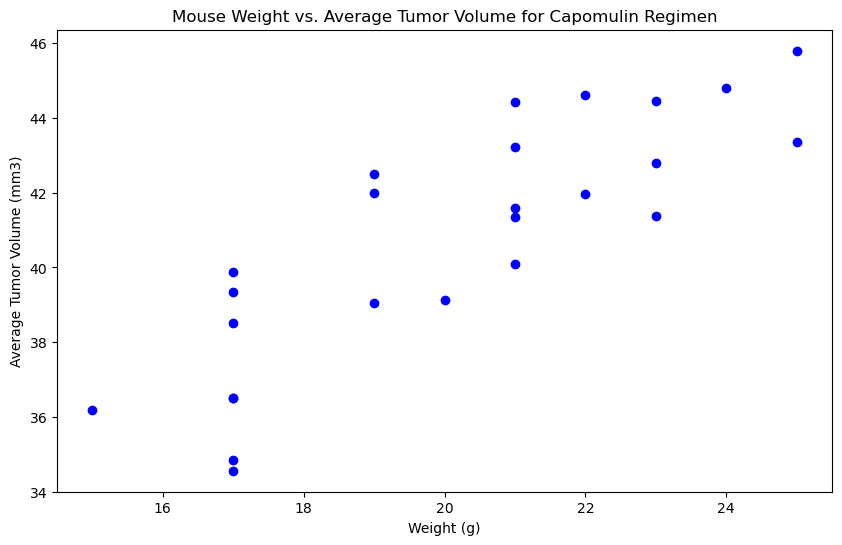

In [164]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = capomulin_mouse_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

average_weight = capomulin_mouse_data.groupby('Mouse ID')['Weight (g)'].mean()

average_data = pd.DataFrame({
    'Average Tumor Volume (mm3)': average_tumor_volume,
    'Average Weight (g)': average_weight
})

plt.figure(figsize=(10, 6))
plt.scatter(average_data['Average Weight (g)'], average_data['Average Tumor Volume (mm3)'], color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

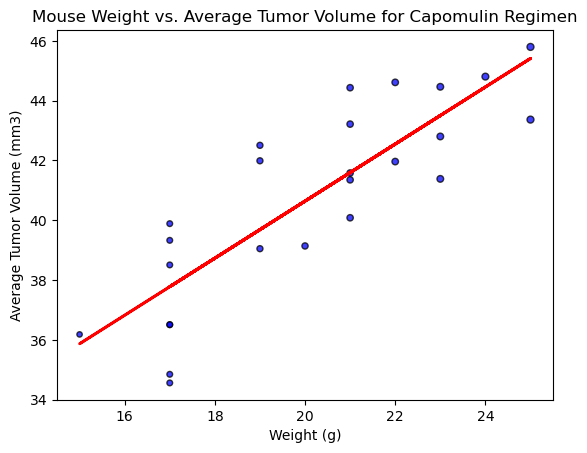

In [165]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(average_weight, average_tumor_volume)

slope, intercept, r_value, p_value, std_err = st.linregress(average_weight, average_tumor_volume)

predicted_tumor_volume = slope * average_weight + intercept

regression_equation = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(average_weight, average_tumor_volume, marker='o', facecolors='blue', edgecolors='black', s=average_weight, alpha=0.75)
plt.plot(average_weight, predicted_tumor_volume, color='red', linewidth=2)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()